# Lebenszufriedenheit in verschiedenen Ländern
Gruppe: Laura Gjugja, Miriam Ilak de Brito, Miriam Fenollosa Muñoz

## 1. Fragestellungen und Datenbeschaffung
### 1.1 Titel: 
- Lebenszufriedenheit verschiedener Länder
### 1.2 Fragestellung:
- Wie unterscheidet sich die Lebenszufriedenheit zwischen den 5 am besten und 5 am schlechtesten abschneidenden Ländern in 2011 und 2024? 
- Wie unterscheiden sich die verschiedenen Kontinente?  
- Wie hat sich die Lebenszufriedenheit in der Schweiz verändert?
### 1.3 Datenquelle:
- https://ourworldindata.org/grapher/happiness-cantril-ladder?country=OWID_WRL~OWID_EUR~OWID_ASI~OWID_AFR

### 1.4 Daten beschaffen und laden

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("happiness-cantril-ladder.csv", skiprows=1,
                 names= ["Entity", "Code", "Year", "Cantril_ladder_score"])
df.head()

,Entity,Code,Year,Cantril_ladder_score
0,Afghanistan,AFG,2011,4.258
1,Afghanistan,AFG,2012,4.040
2,Afghanistan,AFG,2014,3.575
3,Afghanistan,AFG,2015,3.360
4,Afghanistan,AFG,2016,3.794


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format.
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre in aufsteigender Reihenfolge. In den Spalten steht die Lebenszufriedenheit ausgehend von einer Skala von 0 - 10.

In [43]:
df_pivot = df.pivot(index='Entity', columns='Year', values='Cantril_ladder_score')
df_pivot.head()

Year,2011,2012,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Entity,,,,,,,,,,,,,
Afghanistan,4.258000,4.040000,3.575000,3.360000,3.79400,3.632000,3.203000,2.566900,2.523000,2.404000,1.859000,1.721000,1.36400
Africa,4.453846,4.618466,4.476437,4.397037,4.46021,4.449756,4.517125,4.463035,4.553698,4.519978,4.428142,4.386864,4.39082
Albania,5.134000,5.550000,4.959000,4.655000,4.64400,4.586000,4.719000,4.882700,5.117000,5.199000,5.277000,5.304000,5.41100
Algeria,5.368000,5.422000,5.605000,6.355000,5.87200,5.295000,5.211000,5.005100,4.887000,5.122000,5.329000,5.364000,5.57100
Angola,4.178000,5.589000,4.033000,3.866000,3.79500,3.795000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Unsere Variable ist kontinuierlich. 
- Die Daten wurden im Zeitraum 2011 bis 2024 erhoben. 
- Die Lebenszufriedenheit liegt zwischen 1.364 und 7.856. 
- Die Skala der Lebenszufriedenheit geht von 0 - 10.
- Es sind 178 Gebiete, 169 Codes und 13 Jahre. 
- Die Daten sind nicht komplett, gewisse Gebiete haben keine Daten.
- Insgesamt wurden während 13 Jahren 2112 Daten erhoben. 
- Die Länder mit den wenigsten Daten sind Guyana und Cuba.
- Die höchste Anzahl von fehlenden Daten waren 30, im Jahr 2022.
- Am wenigsten fehlten Daten aus 9 Ländern im Jahr 2014.

In [44]:
df.dtypes

Entity                   object
Code                     object
Year                      int64
Cantril_ladder_score    float64
dtype: object

### 3.1 Analyse Lebenszufriedenheit

In [162]:
df.describe()

,Year,Cantril_ladder_score
count,2112.000000,2112.000000
mean,2017.723011,5.462898
std,3.965923,1.115251
min,2011.000000,1.364000
25%,2015.000000,4.601250
50%,2018.000000,5.457100
75%,2021.000000,6.322500
max,2024.000000,7.856000


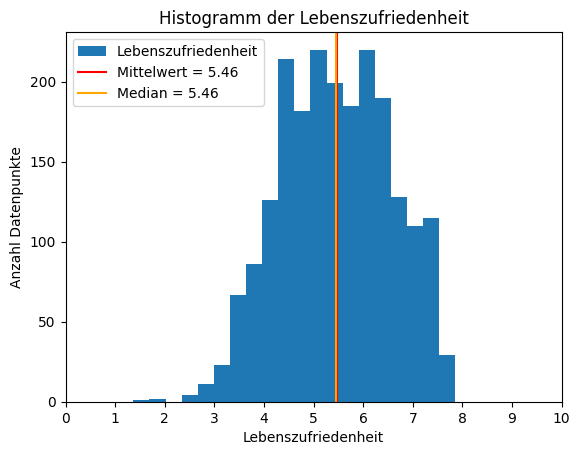

In [234]:
g = df['Cantril_ladder_score'].plot(
    kind='hist',
    bins=20,
    title='Histogramm der Lebenszufriedenheit',
    xlabel='Lebenszufriedenheit',
    ylabel='Anzahl Datenpunkte',
    label='Lebenszufriedenheit'
)
mean = df['Cantril_ladder_score'].mean()
g.axvline(
    x=mean,
    color='red',
    label=f'Mittelwert = {mean:.2f}'
)
median = df['Cantril_ladder_score'].median()
g.axvline(
    x=median,
    color='orange',
    label=f'Median = {median:.2f}'
)
plt.xlim(0, 10)
plt.xticks(range(0, 11))
g.legend()

### 3.2 Analyse Gebiete

In [47]:
df["Entity"].describe()

count            2112
unique            178
top       Afghanistan
freq               13
Name: Entity, dtype: object

In [176]:
# Anzahl Daten pro Gebiet
df['Entity'].value_counts()

Entity
Afghanistan    13
Niger          13
Montenegro     13
Morocco        13
Myanmar        13
               ..
Oman            3
Puerto Rico     2
Maldives        2
Guyana          1
Cuba            1
Name: count, Length: 178, dtype: int64

In [ ]:
# Anzahl Länder pro Jahr ohne Daten
df_pivot.isna().sum()

Year
2011    11
2012    11
2014     9
2015    10
2016    12
2017    11
2018    11
2019    14
2020    18
2021    21
2022    30
2023    24
2024    20
dtype: int64

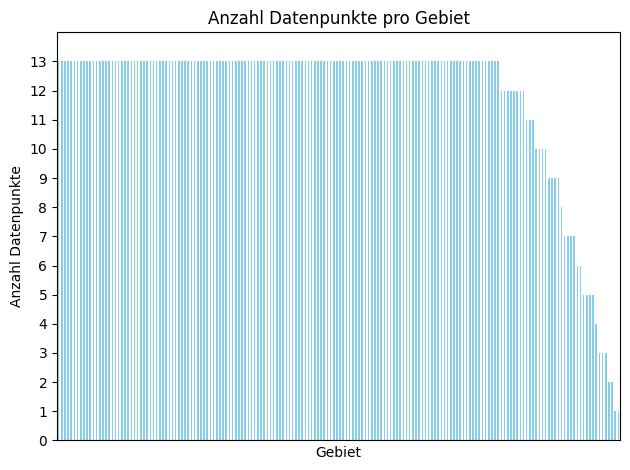

In [225]:
ax = df['Entity'].value_counts().plot(
    kind='bar',
    xticks=[],    
    xlabel="Gebiet",
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro Gebiet",
    color="skyblue"
)
# Y-Achse von 0 bis 14
ax.set_ylim(0, 14)
ax.set_yticks(range(0, 14))  # Ganze Zahlen von 0 bis 14
plt.tight_layout()
plt.show()

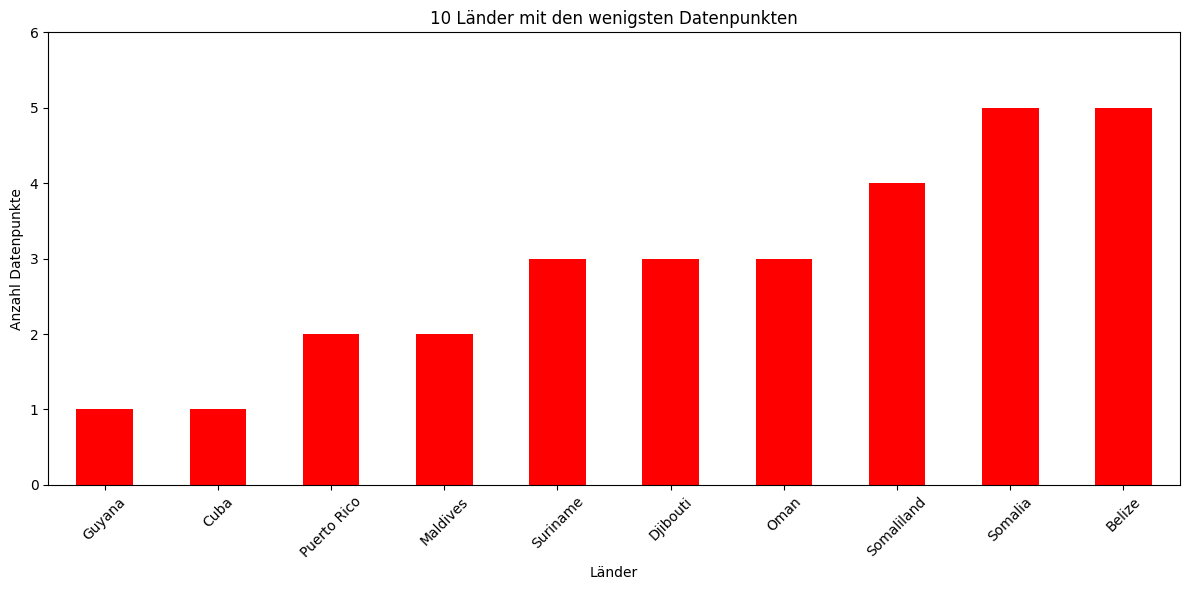

In [235]:
# Anzahl der Datenpunkte pro Land
counts = df['Entity'].value_counts()
# Die 10 Länder mit den wenigsten Daten
least_data = counts.nsmallest(10)
# Balkendiagramm erstellen
plt.figure(figsize=(12,6))
least_data.plot(kind='bar', color='red')
# Beschriftungen
plt.xlabel("Länder")
plt.ylabel("Anzahl Datenpunkte")
plt.title("10 Länder mit den wenigsten Datenpunkten")
plt.xticks(rotation=45)
plt.yticks(range(0, least_data.max()+2))
plt.tight_layout()
plt.show()

### 3.3 Analyse Jahre

In [150]:
df["Year"].describe()

count    2112.000000
mean     2017.723011
std         3.965923
min      2011.000000
25%      2015.000000
50%      2018.000000
75%      2021.000000
max      2024.000000
Name: Year, dtype: float64

In [ ]:
# Anzahl Daten pro Jahr
df['Year'].value_counts().sort_index()

Year
2011    167
2012    167
2014    169
2015    168
2016    166
2017    167
2018    167
2019    164
2020    160
2021    157
2022    148
2023    154
2024    158
Name: count, dtype: int64

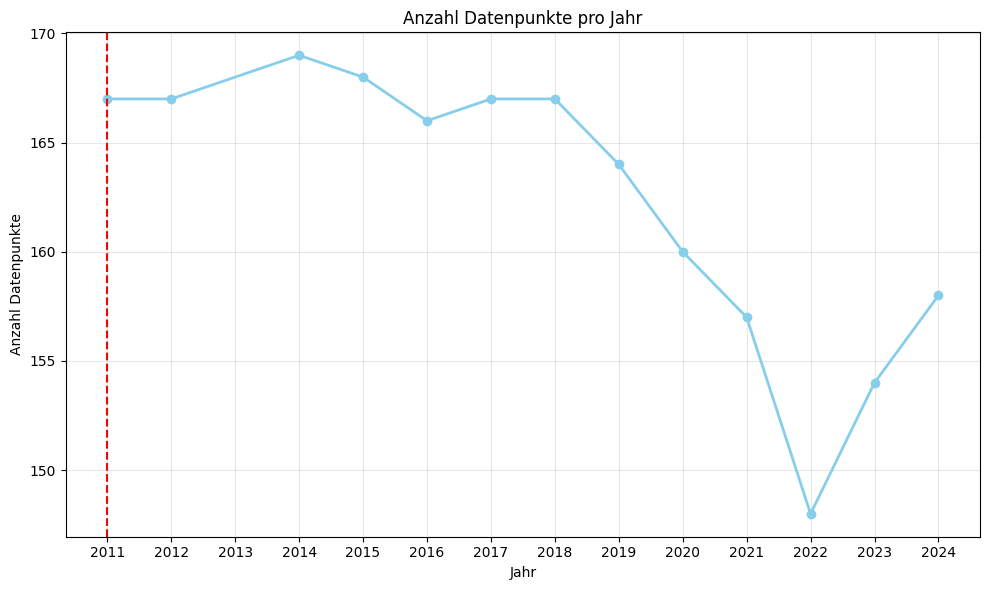

In [236]:
# Anzahl Datenpunkte pro Jahr berechnen
counts_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
# Liniendiagramm
plt.plot(counts_per_year.index, counts_per_year.values, marker='o', color='skyblue', linewidth=2)
# Linie 2011
plt.axvline(x=2011, color='red', linestyle='--')
# Beschriftung
plt.xlabel("Jahr")
plt.ylabel("Anzahl Datenpunkte")
plt.title("Anzahl Datenpunkte pro Jahr")
plt.xticks(range(counts_per_year.index.min(), counts_per_year.index.max()+1))  # jedes Jahr auf X-Achse
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 3.4 Analyse Codes

In [53]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  169


In [54]:
df['Code'].value_counts()

Code
AFG    13
PHL    13
MNE    13
MAR    13
MMR    13
       ..
OMN     3
MDV     2
PRI     2
GUY     1
CUB     1
Name: count, Length: 168, dtype: int64

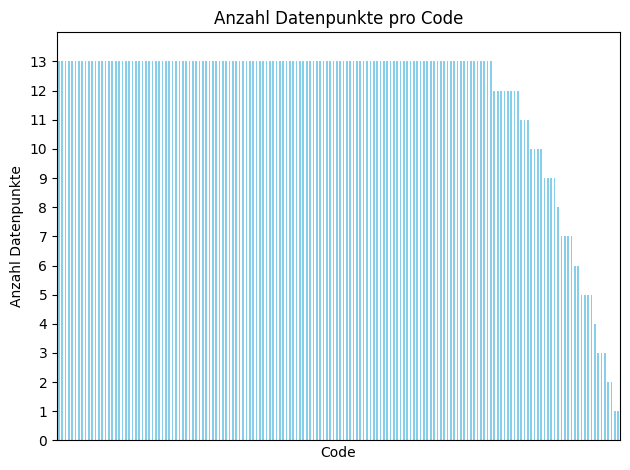

In [228]:
ax = df['Code'].value_counts().plot(
    kind='bar',
    xticks=[],    
    xlabel="Code",
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro Code",
    color="skyblue"
)
# Y-Achse von 0 bis 14
ax.set_ylim(0, 14)
ax.set_yticks(range(0, 14))  # Ganze Zahlen von 0 bis 14
plt.tight_layout()
plt.show()

## 4. Analyse 
### Beobachtungen
#### 4.1 Wie unterscheidet sich die Lebenszufriedenheit zwischen den 5 am besten und 5 am schlechtesten abschneidenden Ländern in 2011 und 2024?
4.1.1) 2011 waren Skandinavien, Niederlande und Schweiz am zufriedensten. Am unzufriedesten waren afrikanische Gebiete. 2024 sind skandinavische Länder immer noch an der Spitze sowie auch die Niederlande. Auch die afrikanischen Länder bleiben am unzufriedesten, neu sind Afghanistan und Libanon aus dem asiatischen Raum dazugekommen.

#### 4.2 Wie unterscheiden sich die verschiedenen Kontinente?
4.2.1) 2011 und 2024 unterscheiden sich in der Rangfolge nicht. Jedoch sind alle Kontinente im Jahr 2024 unzufriedener ausser Asien und Europa. Auch hier sieht man, dass Afrika, wie bereits festgestellt am unzufriedensten ist. Obwohl europäische Länder in unseren angeschauten Jahren die Spitzenreiter sind, ist Ozeanien der zufriedenste Kontinent. Südamerika hat im Verlauf der Statistik am meisten Schwankungen.

#### 4.3 Wie hat sich die Lebenszufriedenheit in der Schweiz verändert?
4.3.1) Die Lebenszufriedenheit in der Schweiz hat ab dem Jahr 2020 abgenommen. 
### Interpretation
4.1.2) Skandivantische Länder, Niederlande und Schweiz sind besonders zufrieden, da sie politisch stabil, wohlhabend und starke Sozialstaaten sind. Afrikanische Länder sind eher unzufrieden wegen Hungersnöten, Armut, Korruption in der Politik, Militärgewalt, schlechter Bildung und generell schlechten Lebensbedingungen. Afghanistan ist 2024 dazugekommen, da 2021 zum zweiten Mal die Taliban an die Macht gekommen sind. 2019 begann in Libanon die Wirtschaftskrise, die sich bis 2024 fortsetzte, auch die Armut nahm zu. Zudem herrschen Grenzspannungen mit Israel seit 2023.

Quellen: 
- https://www.hrw.org/world-report/2025/country-chapters/lebanon?
- https://www.worldbank.org/en/news/press-release/2024/12/10/lebanon-s-economic-contraction-deepens-highlighting-critical-need-for-reforms-and-key-investments?
- https://www.tbsnews.net/world/south-asia/taliban-mark-two-years-return-power-afghanistan-682838?
- https://www.norden.org/en/nyhed/dont-worry-be-happy-state-democracy-nordic-countries?
- https://www.kas.de/de/web/auslandsinformationen/artikel/detail/-/content/afrikas-urbane-zukunft?


4.2.2) Die meisten Kontinente wurden unzufriedenener aufgrund der Inflation. Auch die Pandemie führte zu mentalen, sozialen und wirtschaftlichen Belastungen. Europa wurde zufriedener, da viele europäische Länder starke soziale Sicherheitsnetze und Gesundheitssysteme haben, die Krisen abfedern können. In manchen europäischen Staaten blieb die Lebenszufriedenheit vergleichsweise stabil, trotz Herausforderungen, wenn auch mit nationalen Unterschieden. Auch in Asien stieg die Zufriedenheit durch jüngere Bevölkerungen, schneller wirtschaftlicher Erholung und familiären Strukturen, die sozialen Rückhalt geben. Am zufriedensten ist Ozeanien, da sie höheres Einkommen, bessere wirtschatliche Ressourcen, starke soziale Unterstützung, hohe Lebenserwartung und Gesundheit und mehr Freiheit haben. Südamerika hat am meisten Schwankungen, da soziale Isolation, Einsamkeit und weniger stabile soziale Beziehungen stärker mit Unzufriedenheit korrelieren. In vielen südamerikanischen Ländern gibt es regelmässige politische und wirtschaftliche Schwankungen z. B. Wirtschaftskrisen, Inflation, Regierungswechsel und Vertrauenskrisen in Institutionen. Diese Unsicherheiten wirken sich stark auf die subjektive Lebenszufriedenheit aus, weil Menschen kurzfristig schlechtere Erwartungen an Zukunft, Einkommen und Sicherheit entwickeln. 

Quellen: 
- https://wellbeing.hmc.ox.ac.uk/news/world-happiness-report-2024/?
- https://en.wikipedia.org/wiki/World_Happiness_Report?
- https://www.ipsos.com/de-ch/globale%20Einstellungen%20zu%20Glück%20und%20Lebensqualität?
- https://link.springer.com/article/10.1007/s11482-018-9606-3?

4.3.2) In der Schweiz nimmt die Lebenszufriedenheit ab 2020 ab, da dann die Massnahmen zur Bekämpfung der Covid-Pandemie begannen. Durch Corona nahmen psychische, wirtschaftliche und soziale Belastungen zu, weswegen eine grössere Unzufriedenheit entsand.

Quellen:
- https://forscenter.ch/wp-content/uploads/2020/09/factsheet_wellbeing.pdf?
- https://de.wikipedia.org/wiki/Sozioökonomische_Auswirkungen_der_COVID-19-Pandemie?

### Berechnung

In [229]:
top5_countries_2011 = (
    df[df["Year"] == 2011]
      .groupby("Entity")["Cantril_ladder_score"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)
print("Top 5 Länder im Jahr 2011:")
print(top5_countries_2011)

Top 5 Länder im Jahr 2011:
Entity
Denmark        7.856
Finland        7.579
Norway         7.524
Netherlands    7.512
Switzerland    7.499
Name: Cantril_ladder_score, dtype: float64


In [230]:
bottom5_countries_2011 = (
    df[df["Year"] == 2011]
      .groupby("Entity")["Cantril_ladder_score"]
      .mean()
      .sort_values(ascending=True)
      .head(5)
)
print("5 Länder mit der tiefsten Lebenszufriedenheit im Jahr 2011:")
print(bottom5_countries_2011)

5 Länder mit der tiefsten Lebenszufriedenheit im Jahr 2011:
Entity
Togo                        3.007
Benin                       3.493
Central African Republic    3.568
Sierra Leone                3.586
Burundi                     3.678
Name: Cantril_ladder_score, dtype: float64


### Visualisierung

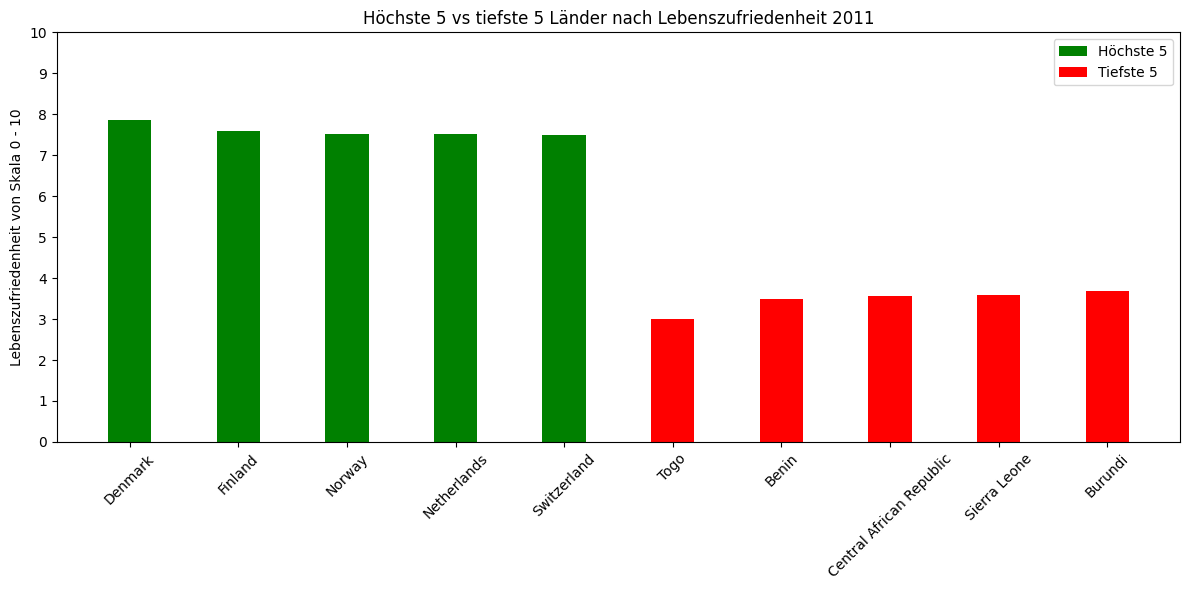

In [237]:
# Top 5 Länder
top5 = (
    df[df["Year"] == 2011]
      .set_index("Entity")["Cantril_ladder_score"]
      .sort_values(ascending=False)
      .head(5)
)
# Bottom 5 Länder
bottom5 = (
    df[df["Year"] == 2011]
      .set_index("Entity")["Cantril_ladder_score"]
      .sort_values(ascending=True)
      .head(5)
)
labels = list(top5.index) + list(bottom5.index)
scores = list(top5.values) + list(bottom5.values)
x = list(range(len(labels)))
width = 0.4
plt.figure(figsize=(12,6))
plt.bar(x[:5], top5.values, width, label="Höchste 5", color="green")
plt.bar(x[5:], bottom5.values, width, label="Tiefste 5", color="red")
# Beschriftung
plt.xticks(x, labels, rotation=45)
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Höchste 5 vs tiefste 5 Länder nach Lebenszufriedenheit 2011")
plt.ylim(0, 10) # Y-Achse von 0 bis 10
plt.yticks(range(0, 11)) # Ganze Zahlen
plt.legend()
plt.tight_layout()
plt.show()

### Berechnung

In [231]:
top5_countries_2024 = (
    df[df["Year"] == 2024]
      .groupby("Entity")["Cantril_ladder_score"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)
print("Top 5 Länder im Jahr 2024:")
print(top5_countries_2024)

Top 5 Länder im Jahr 2024:
Entity
Finland        7.736
Denmark        7.521
Iceland        7.515
Sweden         7.345
Netherlands    7.306
Name: Cantril_ladder_score, dtype: float64


In [232]:
bottom5_countries_2024 = (
    df[df["Year"] == 2024]
      .groupby("Entity")["Cantril_ladder_score"]
      .mean()
      .sort_values(ascending=True)
      .head(5)
)
print("5 Länder mit der tiefsten Lebenszufriedenheit im Jahr 2024:")
print(bottom5_countries_2024)

5 Länder mit der tiefsten Lebenszufriedenheit im Jahr 2024:
Entity
Afghanistan     1.364
Sierra Leone    2.998
Lebanon         3.188
Malawi          3.260
Zimbabwe        3.396
Name: Cantril_ladder_score, dtype: float64


### Visualisierung

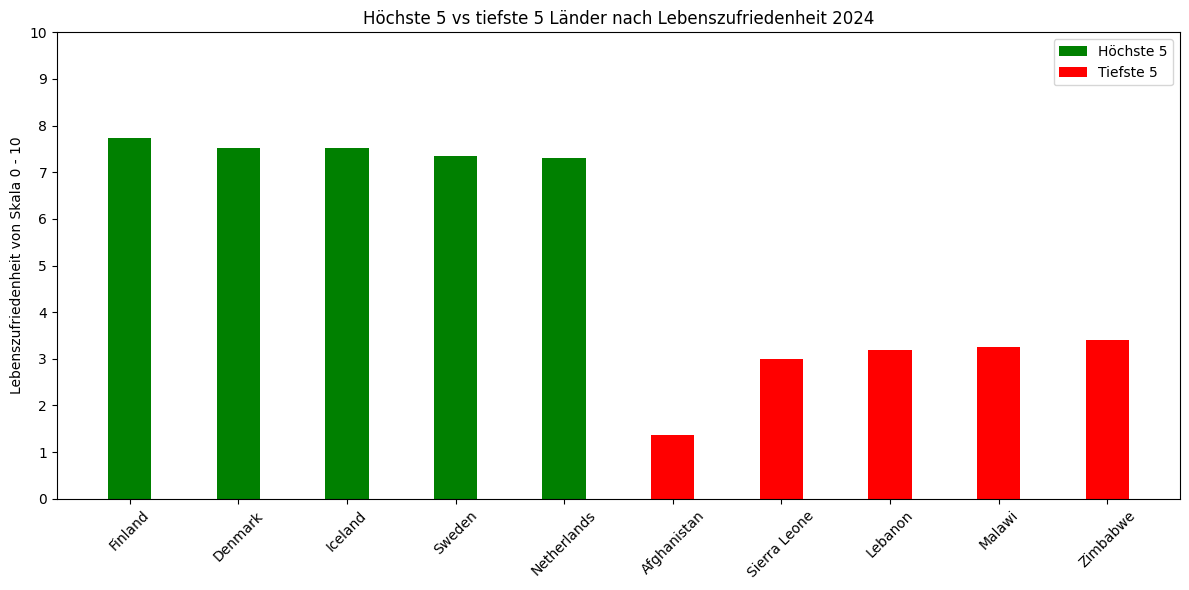

In [238]:
# Top 5 Länder
top5 = (
    df[df["Year"] == 2024]
      .set_index("Entity")["Cantril_ladder_score"]
      .sort_values(ascending=False)
      .head(5)
)
# Bottom 5 Länder
bottom5 = (
    df[df["Year"] == 2024]
      .set_index("Entity")["Cantril_ladder_score"]
      .sort_values(ascending=True)
      .head(5)
) 
labels = list(top5.index) + list(bottom5.index)
scores = list(top5.values) + list(bottom5.values)
x = list(range(len(labels)))
width = 0.4
plt.figure(figsize=(12,6))
plt.bar(x[:5], top5.values, width, label="Höchste 5", color="green")
plt.bar(x[5:], bottom5.values, width, label="Tiefste 5", color="red")
# Beschriftung
plt.xticks(x, labels, rotation=45)
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Höchste 5 vs tiefste 5 Länder nach Lebenszufriedenheit 2024")
plt.ylim(0, 10) # Y-Achse von 0 bis 10
plt.yticks(range(0, 11)) # Ganze Zahlen
plt.legend()
plt.tight_layout()
plt.show()

### Berechnung

In [ ]:
continents = ["North America", "South America", "Africa", "Europe", "Asia", "Oceania"]
# Daten 2011
df_2011 = df[df["Year"] == 2011]
# Nur Kontinente
df_continents_2011 = df_2011[df_2011["Entity"].isin(continents)]
avg_by_continent = df_continents_2011.set_index("Entity")["Cantril_ladder_score"]
print("Lebenszufriedenheit pro Kontinent (2011):")
print(avg_by_continent)

Lebenszufriedenheit pro Kontinent (2011):
Entity
Africa           4.453846
Asia             4.982614
Europe           6.129434
North America    6.923755
Oceania          7.349405
South America    6.371585
Name: Cantril_ladder_score, dtype: float64


In [211]:
# Daten 2024 
df_2024 = df[df["Year"] == 2024]
# Nur Kontinente
df_continents_2024 = df_2024[df_2024["Entity"].isin(continents)]
avg_by_continent = df_continents_2024.set_index("Entity")["Cantril_ladder_score"]
print("Lebenszufriedenheit pro Kontinent (2024):")
print(avg_by_continent)

Lebenszufriedenheit pro Kontinent (2024):
Entity
Africa           4.390820
Asia             5.190590
Europe           6.388318
North America    6.732753
Oceania          6.970407
South America    6.277881
Name: Cantril_ladder_score, dtype: float64


### Visualisierung

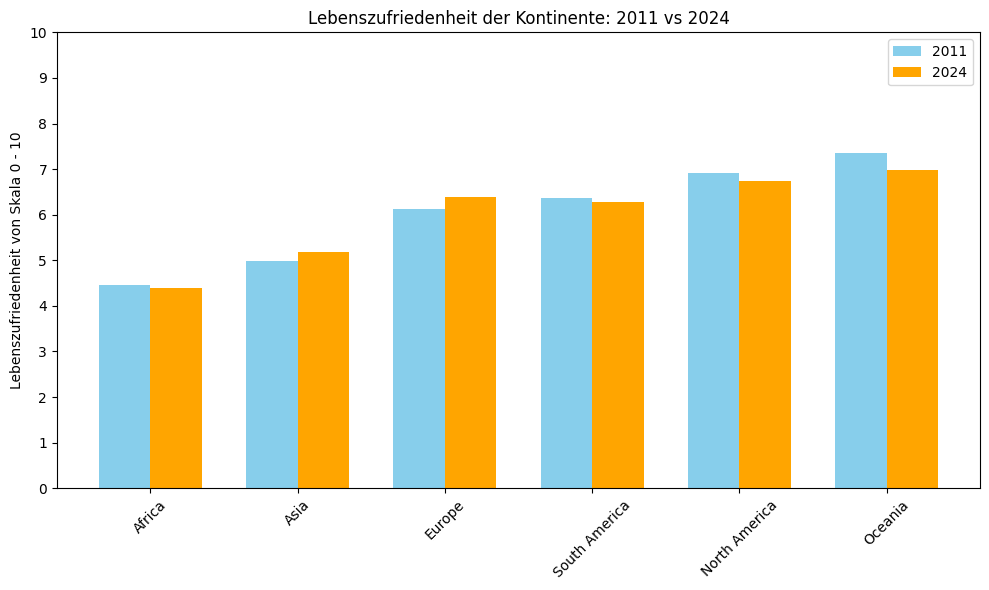

In [239]:
# Werte 2011
df_2011 = df[df["Year"] == 2011]
values_2011 = df_2011[df_2011["Entity"].isin(continents)].set_index("Entity")["Cantril_ladder_score"]
# Werte 2024
df_2024 = df[df["Year"] == 2024]
values_2024 = df_2024[df_2024["Entity"].isin(continents)].set_index("Entity")["Cantril_ladder_score"]
# Sortieren nach Werten 2011
values_2011 = values_2011.sort_values()  # aufsteigend: tiefste -> höchste
values_2024 = values_2024[values_2011.index]  # Reihenfolge an 2011 anpassen
width = 0.35
x = range(len(values_2011))
plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], values_2011.values, width, label="2011", color="skyblue")
plt.bar([i + width/2 for i in x], values_2024.values, width, label="2024", color="orange")
# Beschriftung
plt.xticks(x, values_2011.index, rotation=45)
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Lebenszufriedenheit der Kontinente: 2011 vs 2024")
plt.ylim(0, 10)  # Y-Achse von 0 bis 10
plt.yticks(range(0, 11))  # Ganze Zahlen
plt.legend()
plt.tight_layout()
plt.show()

### Berechnung

In [214]:
# Pivot-Tabelle: Kontinent pro Jahr
table = df[df["Entity"].isin(continents)].pivot(index="Entity", columns="Year", values="Cantril_ladder_score")
print(table)

Year               2011      2012      2014      2015      2016      2017  \
Entity                                                                      
Africa         4.453846  4.618466  4.476437  4.397037  4.460210  4.449756   
Asia           4.982614  5.031361  5.007458  4.981026  4.974973  4.918314   
Europe         6.129434  6.088926  6.100986  6.137458  6.165313  6.179685   
North America  6.923755  6.914968  6.959360  6.860802  6.744117  6.671660   
Oceania        7.349405  7.329126  7.284322  7.316392  7.288870  7.280471   
South America  6.371585  6.605793  6.677414  6.604779  6.361448  6.176329   

Year               2018      2019      2020      2021      2022      2023  \
Entity                                                                      
Africa         4.517125  4.463035  4.553698  4.519978  4.428142  4.386864   
Asia           4.849117  4.731296  4.843564  4.889135  5.004606  5.078239   
Europe         6.240796  6.301991  6.337145  6.339464  6.357478  6.344568  

### Visualisierung

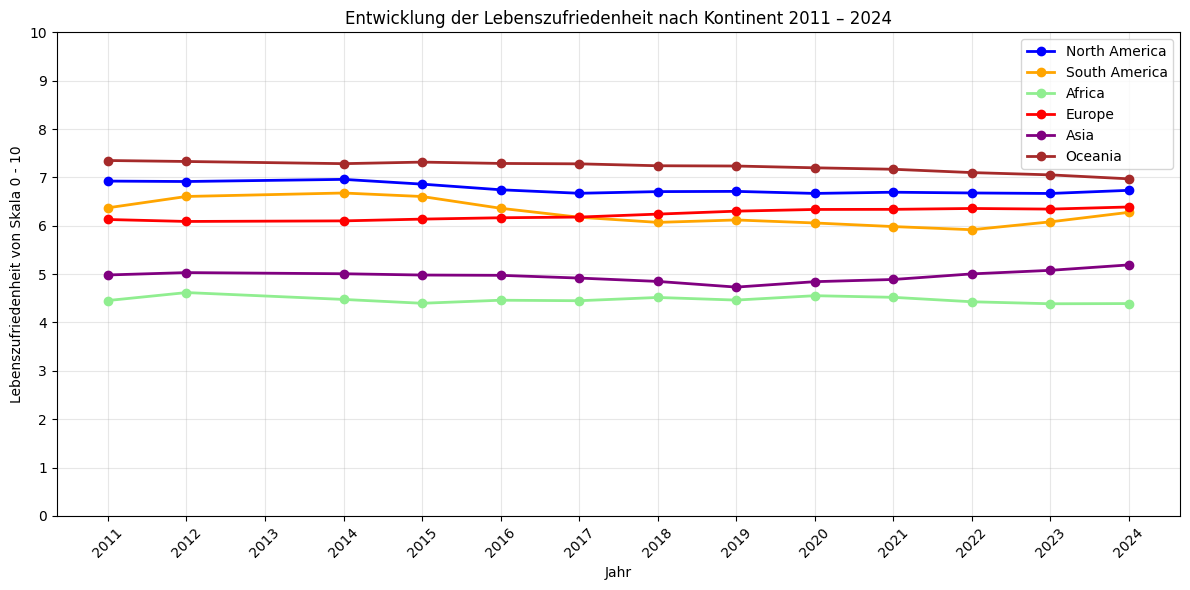

In [240]:
colors = {
    "North America": "blue",  
    "South America": "orange",  
    "Africa": "lightgreen",         
    "Europe": "red",          
    "Asia": "purple",           
    "Oceania": "brown"        
}
plt.figure(figsize=(12,6))
for cont in continents:
    df_cont = df[df["Entity"] == cont].sort_values("Year")
    plt.plot(
        df_cont["Year"],
        df_cont["Cantril_ladder_score"],
        marker="o",
        label=cont,
        color=colors[cont],
        linewidth=2
    )
# Beschriftung
plt.xlabel("Jahr")
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Entwicklung der Lebenszufriedenheit nach Kontinent 2011 – 2024")
plt.ylim(0, 10)  # Y-Achse von 0 bis 10
plt.yticks(range(0, 11))  # Ganze Zahlen 
plt.xticks(range(2011, 2025, 1), rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Berechnung

In [219]:
# Jahresdaten Schweiz
for jahr, wert in schweiz_jahresdaten:
    print(f"{jahr}: {wert}")

2011: 7.499
2012: 7.65
2014: 7.587
2015: 7.509
2016: 7.494
2017: 7.487
2018: 7.48
2019: 7.5599
2020: 7.571
2021: 7.512
2022: 7.24
2023: 7.06
2024: 6.935


### Visualisierung

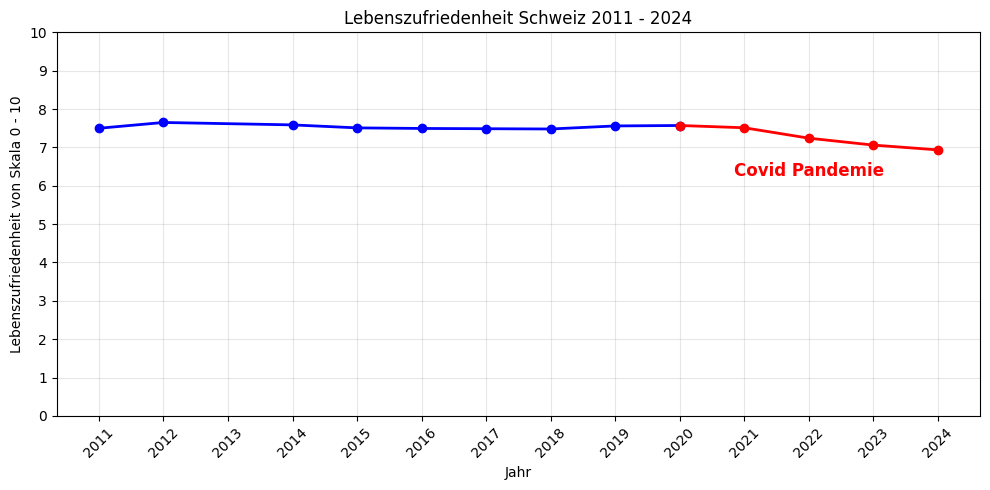

In [223]:
# Daten Schweiz
df_switzerland = df[df["Entity"] == "Switzerland"].sort_values("Year")
years = df_switzerland["Year"].tolist()
values = df_switzerland["Cantril_ladder_score"].tolist()
plt.figure(figsize=(10,5))
idx_2020 = years.index(2020)
plt.plot(years[:idx_2020+1], values[:idx_2020+1],
         marker="o", color="blue", linewidth=2)
plt.plot(years[idx_2020:], values[idx_2020:],
         marker="o", color="red", linewidth=2)
mid_year = (years[idx_2020] + years[-1]) / 2
mid_value = (values[idx_2020] + values[-1]) / 2
plt.text(mid_year, mid_value - 1, "Covid Pandemie", color="red", 
         fontsize=12, fontweight="bold", ha="center")
plt.xticks(range(2011, 2025, 1), rotation=45)
yticks = [i * 1 for i in range(0, 201)]
plt.yticks(yticks)
plt.ylim(0, 10)
# Beschriftung
plt.xlabel("Jahr")
plt.ylabel("Lebenszufriedenheit von Skala 0 - 10")
plt.title("Lebenszufriedenheit Schweiz 2011 - 2024")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()